<a href="https://colab.research.google.com/github/mdaugherity/MachineLearning2023/blob/main/Tutorial_10_Titanic_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dr. Daugherity, PHYS 453**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml   # for getting the data set

# Tutorial 10: Titanic Pandas

A quick intro to looking at Titanic data with a *very brief* intro on using Pandas.

**References**
* https://pandas.pydata.org/docs/user_guide/10min.html
* https://pandas.pydata.org/docs/user_guide/visualization.html
* The dataset: https://www.openml.org/search?type=data&status=active&id=40945
* https://www.encyclopedia-titanica.org/explorer/



Here's a picture of pandas on the Titanic I made with DALLE 2

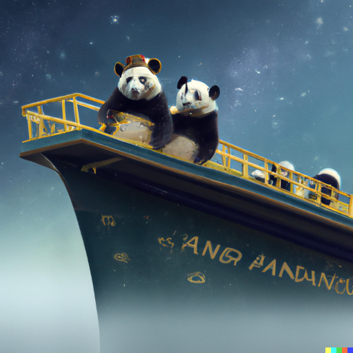

# Pandas Basics

A Pandas **dataframe** is essentially a spreadsheet with rows and columns, but vastly more powerful. A good place to start learning is here: https://pandas.pydata.org/docs/user_guide/10min.html

 I'll show just a few basics below.


In [ ]:
# Make a simple dataframe
x = np.linspace(0,3,4)
y = x**2
names = ['Abe','Bob','Cal','Dot']
df = pd.DataFrame({'Names':names,'x':x,'y':y})
df

,Names,x,y
0,Abe,0.0,0.0
1,Bob,1.0,1.0
2,Cal,2.0,4.0
3,Dot,3.0,9.0


In [ ]:
df.head(2)  # show first 2 rows, use "tail" for last rows

,Names,x,y
0,Abe,0.0,0.0
1,Bob,1.0,1.0


## Columns

In [ ]:
df.x  # Access a single column
# this returns a Pandas 'Series' (which is just a 1D dataframe with index and values).  

0    0.0
1    1.0
2    2.0
3    3.0
Name: x, dtype: float64

In [ ]:
df['x']  # Another way to do the same thing

0    0.0
1    1.0
2    2.0
3    3.0
Name: x, dtype: float64

In [ ]:
df.x.values  # returns just the values

array([0., 1., 2., 3.])

In [ ]:
# View certain columns
df[['Names','x']]   # NOTE THE DOUBLE BRACKETS!

# A normal way to do this is to make a list like cols=['x','y'], then use df[cols]

,Names,x
0,Abe,0.0
1,Bob,1.0
2,Cal,2.0
3,Dot,3.0


In [ ]:
# Make a new column
df['z'] = df.x + df.y
df

,Names,x,y,z
0,Abe,0.0,0.0,0.0
1,Bob,1.0,1.0,2.0
2,Cal,2.0,4.0,6.0
3,Dot,3.0,9.0,12.0


## Searching Rows

In [ ]:
df[df.x>=2]  # all rows where x>=2

,Names,x,y,z
2,Cal,2.0,4.0,6.0
3,Dot,3.0,9.0,12.0


In [ ]:
df[(df.x>=2) & (df.y>5)]

,Names,x,y,z
3,Dot,3.0,9.0,12.0


In [ ]:
df[df.Names=='Bob']  # find Bob

,Names,x,y,z
1,Bob,1.0,1.0,2.0


# Titanic Data

Now on to the big show.  This is our first example of *real world data*, which is a synomyn for **messy**.  

In [ ]:
# Load Titanic
data = fetch_openml(name="titanic",version=1, as_frame=True)

df_raw = data.frame # the raw data
df_raw.head()

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


This dataset is fascinating.  Let's look at a few columns:
* pclass = Passenger Class 1, 2, or 3
* survived = 1 for people who survived, they will have a lifeboat number in boat and the body column should be blank.  Not all bodies are recovered.
* sibsp = number of siblings (for kids) or spouses (for adults) aboard
* parch = number of parents (for kids) or children (for adults) aboard
* fare is in old British money (pounds / shillings / pence) which gives weird fractions

Notice the tradegies we see in the first 5 rows alone.  Miss Allen (row 0) is a first-class passenger traveling alone who survives.  Next we get the Allison family of four (rows 1-4).  The parents each have 1 spouse (sibsp) and 2 children (parch) aboard, the kids each have 1 sibling and 2 parents.  Only the 11-month old infant is put on a lifeboat and survives. 


# Answering Questions

In [ ]:
df_raw.dtypes

pclass        float64
survived     category
name           object
sex          category
age           float64
sibsp         float64
parch         float64
ticket         object
fare          float64
cabin          object
embarked     category
boat           object
body           object
home.dest      object
dtype: object

Notice that we have 3 kinds of columns:  
* float64 = numbers (with decimal points)
* category = a few discrete options (e.g. sex = male or female, survived = 0 or 1)
* object = complicated stuff, usually text or mixed types

Also notice that **pclass has the wrong type**, it really ought to be a category instead of a float64.  Let's fix that.  First I'll change it to an integer to get rid of the decimal point, then make it a category


In [ ]:
df_raw['pclass_cat'] = df_raw.pclass.astype('int').astype('category')

## Numeric Columns

By default the **describe** command gives us info on numeric columns

In [ ]:
df_raw.describe()

,pclass,age,sibsp,parch,fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479
std,0.837836,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


We can do all of the typical math and statistics on numerical data

In [ ]:
df_raw.parch.max()

9.0

In [ ]:
df_raw[df_raw.parch==9]  # the family with 9 kids on the Titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,pclass_cat
1179,3.0,0,"Sage, Mr. John George",male,NaN,1.0,9.0,CA. 2343,69.55,None,S,None,NaN,None,3
1180,3.0,0,"Sage, Mrs. John (Annie Bullen)",female,NaN,1.0,9.0,CA. 2343,69.55,None,S,None,NaN,None,3


In [ ]:
df_raw[df_raw.survived=='1']['age'].mean()   # average age of survivors

28.918228103044495

In [ ]:
df_raw[df_raw.survived=='0']['age'].mean()   # average age of non-survivors

30.54536882067851

## Category Data
In general, we can not do math with category data *even if it looks like a number!*  Instead, we use these to sort and group data.  Useful tricks for categories are **unique**, **value_counts**, and **groupby**. 

In [ ]:
df_raw.survived.value_counts()

0    809
1    500
Name: survived, dtype: int64

In [ ]:
df_raw.survived.describe() # describe works differently for categories

count     1309
unique       2
top          0
freq       809
Name: survived, dtype: object

In [ ]:
df_raw.embarked.unique() # shows unique values

['S', 'C', NaN, 'Q']
Categories (3, object): ['C', 'Q', 'S']

In [ ]:
df_raw.pclass_cat.value_counts()

3    709
1    323
2    277
Name: pclass_cat, dtype: int64

In [ ]:
df_raw.groupby('survived').size()

survived
0    809
1    500
dtype: int64

In [ ]:
df_raw.groupby(['survived','sex']).size()

survived  sex   
0         female    127
          male      682
1         female    339
          male      161
dtype: int64

# Raw Data Plots
Before we mess with anything, take a look at what we've got

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

**IMPORTANT**: remember that numbers and categories are treated differently in plotting 

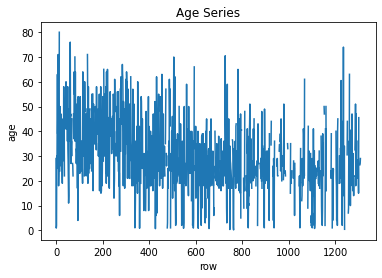

In [ ]:
df_raw.age.plot()
plt.title('Age Series')
plt.xlabel('row')
plt.ylabel('age')
plt.show()

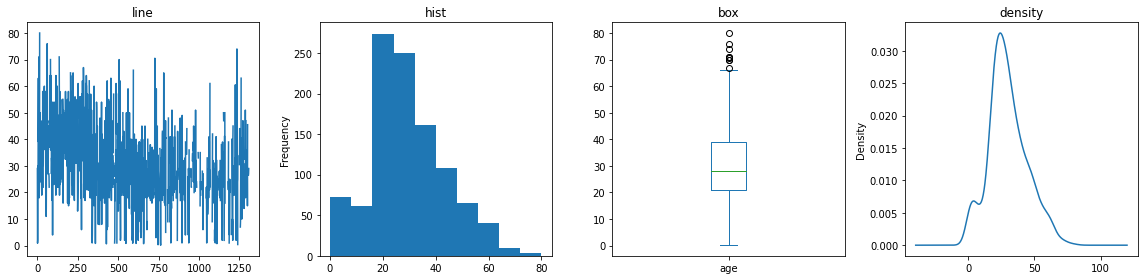

In [ ]:
# Different plot kinds for a numeric distribution
plt.figure(figsize=(16,4))
kinds = ['line','hist','box','density']
NUM = len(kinds)

for i in range(NUM):
  plt.subplot(1,NUM,i+1)
  kind = kinds[i]
  df_raw.age.plot(kind=kind)
  plt.title(kind)

plt.tight_layout()

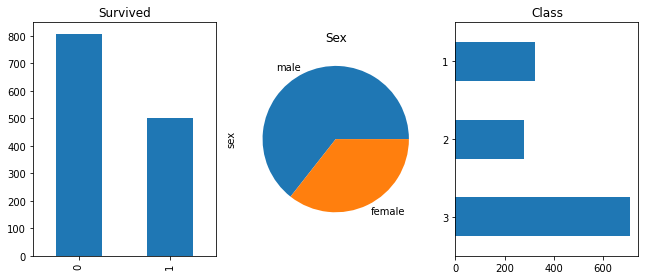

In [ ]:
# Use value_counts to get histograms
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
df_raw.survived.value_counts().plot(kind='bar')
plt.title('Survived')

plt.subplot(1,4,2)
df_raw.sex.value_counts().plot(kind='pie')
plt.title('Sex')

plt.subplot(1,4,3)
#df_raw.pclass_cat.value_counts().plot(kind='barh')
df_raw.pclass_cat.value_counts()[[0,2,1]].plot(kind='barh') # manually re-order :)
plt.title('Class')


plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='age', ylabel='fare'>

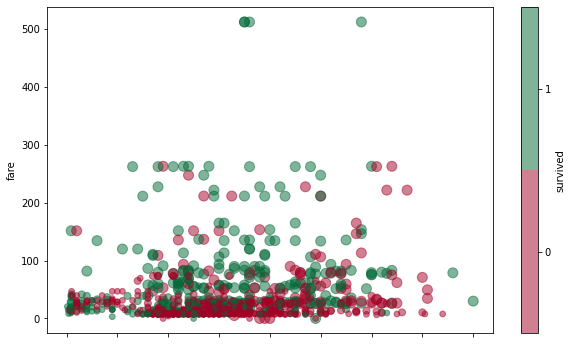

In [ ]:
df_raw.plot(x='age', y='fare',kind='scatter',c='survived',colormap='RdYlGn',s=100/df_raw['pclass'],alpha=0.5,figsize=(10,6))